In [2]:
# Importar librerías necesarias
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = pd.read_csv('groceries.csv')
data.head()  # Ver las primeras filas del dataset

,Transaction,Item
0,1,apple
1,1,coffee
2,1,eggs
3,1,yogurt
4,1,juice


In [3]:
# Convertir los datos en formato de transacciones
basket = data.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)  # Aplicar binarización
basket.head()


C:\Users\usuario\AppData\Local\Temp\ipykernel_21064\3919423052.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)  # Aplicar binarización


Item,apple,banana,bread,butter,cheese,chocolate,coffee,eggs,juice,milk,yogurt
Transaction,,,,,,,,,,,
1,1,0,0,0,0,0,1,1,1,0,1
2,1,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,1,1,0


In [4]:
# Aplicar el algoritmo Apriori para encontrar ítems frecuentes
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head()

c:\Users\usuario\anaconda3\envs\env_101\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
9,0.453077,(milk)
2,0.439231,(bread)
36,0.290000,"(bread, milk)"
6,0.214615,(coffee)
7,0.213077,(eggs)


In [9]:
# Generar reglas de asociación a partir de los conjuntos frecuentes
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(apple),(banana),0.205385,0.197692,0.053846,0.262172,1.326163,0.013243,1.087392,0.309515
1,(banana),(apple),0.197692,0.205385,0.053846,0.272374,1.326163,0.013243,1.092065,0.306547
2,(apple),(butter),0.205385,0.186923,0.046154,0.224719,1.202201,0.007763,1.048751,0.211665
3,(butter),(apple),0.186923,0.205385,0.046154,0.246914,1.202201,0.007763,1.055145,0.206859
4,(apple),(cheese),0.205385,0.208462,0.050769,0.247191,1.185787,0.007954,1.051447,0.197175
5,(cheese),(apple),0.208462,0.205385,0.050769,0.243542,1.185787,0.007954,1.050443,0.197942
6,(apple),(chocolate),0.205385,0.196923,0.047692,0.232210,1.179190,0.007247,1.045959,0.191238
7,(chocolate),(apple),0.196923,0.205385,0.047692,0.242188,1.179190,0.007247,1.048565,0.189223
8,(apple),(coffee),0.205385,0.214615,0.046154,0.224719,1.047078,0.002075,1.013032,0.056583
9,(coffee),(apple),0.214615,0.205385,0.046154,0.215054,1.047078,0.002075,1.012318,0.057248


In [6]:
# Filtrar reglas con alta confianza
high_confidence_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1)]
high_confidence_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(bread),(milk),0.439231,0.453077,0.29,0.660245,1.457247,0.090995,1.609758,0.559543
31,(milk),(bread),0.453077,0.439231,0.29,0.640068,1.457247,0.090995,1.557986,0.573709


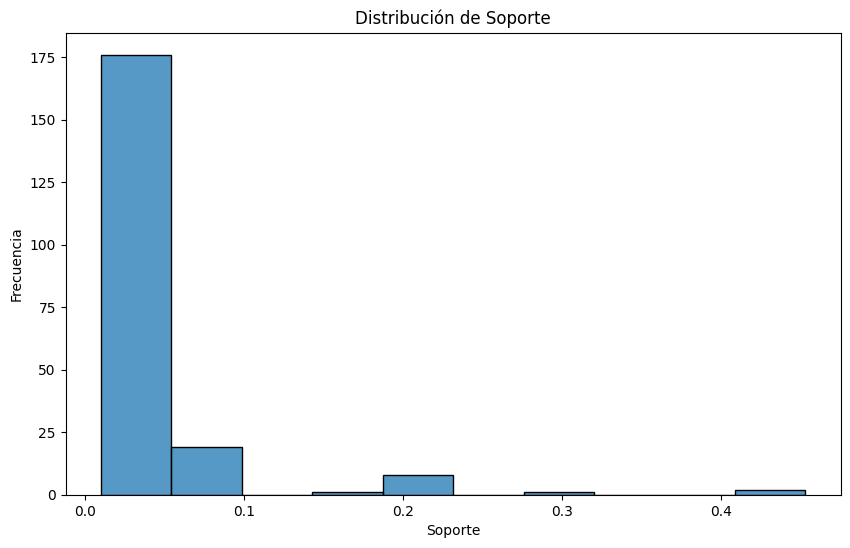

In [7]:
# Visualización del soporte
plt.figure(figsize=(10,6))
sns.histplot(frequent_itemsets['support'], bins=10, kde=False)
plt.title('Distribución de Soporte')
plt.xlabel('Soporte')
plt.ylabel('Frecuencia')
plt.show()


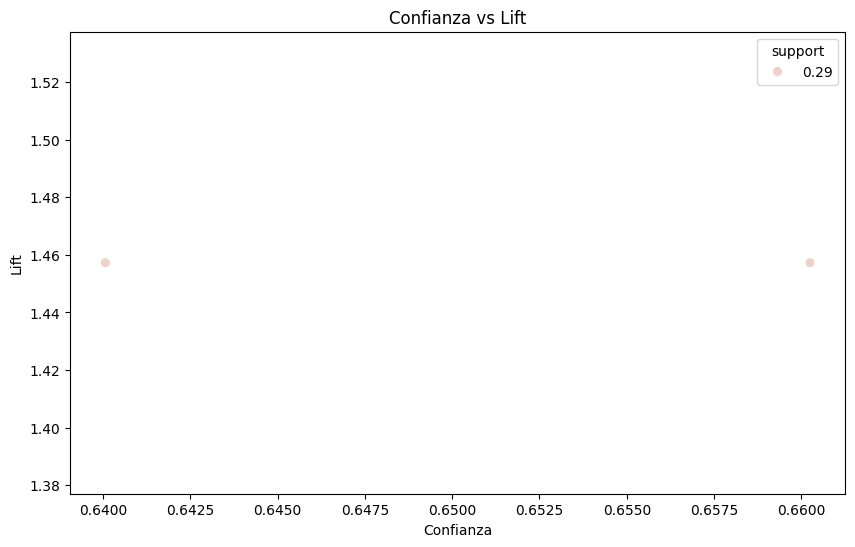

In [8]:
# Gráfico de lift vs confianza
plt.figure(figsize=(10,6))
sns.scatterplot(x='confidence', y='lift', data=high_confidence_rules, hue='support', size='support', sizes=(50, 300))
plt.title('Confianza vs Lift')
plt.xlabel('Confianza')
plt.ylabel('Lift')
plt.show()
